---

<a name="gol"></a>
#  Conways Game of Life

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif">

[Glider Generator Example from Wikipedia](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)

> The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970.
> 
> The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.
> 
> The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, alive or dead, (or populated and unpopulated, respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:
> 
> - Any live cell with fewer than two (<2) live neighbours dies, as if by underpopulation.
> - Any live cell with two or three [2-3) live neighbours lives on to the next generation.
> - Any live cell with more than three (>3) live neighbours dies, as if by overpopulation.
> - Any dead cell with exactly three (3) live neighbours becomes a live cell, as if by reproduction.
> 
> The initial pattern constitutes the seed of the system. The first generation is created by applying the above rules simultaneously to every cell in the seed; births and deaths occur simultaneously, and the discrete moment at which this happens is sometimes called a tick. Each generation is a pure function of the preceding one. The rules continue to be applied repeatedly to create further generations.

The game of life is used as a model in a number of different scientific domains.  Example code can be found here: http://ernie55ernie.github.io/parallel%20programming/2016/03/25/openmp-game-of-life.html

# Interesting examples from Conway's Game of life

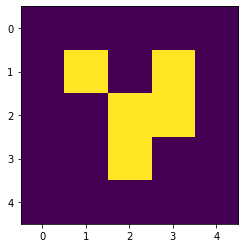

In [1]:
%matplotlib inline

import matplotlib.pylab as plt

import numpy as np

glider = np.zeros((5,5))
glider[1,1] = 1;
glider[3,1] = 1;
glider[2,2] = 1;
glider[3,2] = 1;
glider[2,3] = 1;
glider = glider.T
plt.imshow(glider)

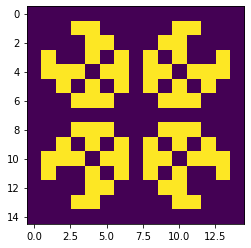

In [2]:
p = np.zeros((6,6))
p[2:3,0] = 1;
p[3,0:3] = 1;
p[4,1] = 1
p[5,2:5] = 1
p[4,3] = 1
p=p.T+p

pulsar=np.zeros((15,15))
pulsar[1:7,1:7] = p
pulsar[8:14, 1:7] = np.flipud(p)
pulsar[1:7, 8:14] = np.fliplr(p)
pulsar[8:14, 8:14] = np.flipud(np.fliplr(p))
plt.imshow(pulsar)

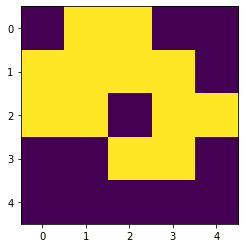

In [3]:
spaceship = np.zeros((5,5))
spaceship[1:3,0:2] = 1;
spaceship[0:2,1:3] = 1;
spaceship[3,1:4] = 1;
spaceship[2,3] = 1;
spaceship[4,2] = 1;
spaceship = spaceship.T
plt.imshow(spaceship)

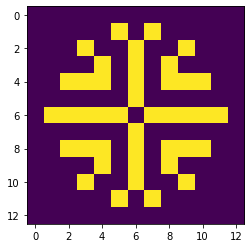

In [4]:
p = np.zeros((6,6))
p[0:5,5] = 1;
p[5,1:5] = 1;
p[4,0] = 1
p[2,1] = 1
p[3,2:4] = 1
p[1:3,3] = 1

Fire=np.zeros((13,13))
Fire[1:7,1:7] = p.T
Fire[6:12, 1:7] = np.flipud(p.T)
Fire[1:7, 6:12] = np.fliplr(p.T)
Fire[6:12, 6:12] = np.flipud(np.fliplr(p.T))
plt.imshow(Fire)

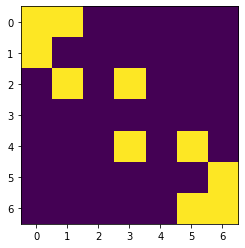

In [5]:
p = np.zeros((4,3))
p[0:2,0] = 1;
p[0,1] = 1
p[1,2] = 1
p[3,2] = 1
plt.imshow(p.T)

Quad=np.zeros((7,7))
Quad[0:3,0:4] = p.T
Quad[4:8,3:7] = np.flipud(np.fliplr(p.T))
plt.imshow(Quad)

In [133]:
Fire.shape

(13, 13)

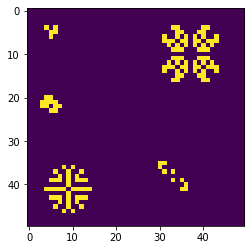

In [136]:
plate=np.zeros((50,50))
plate[3:3+glider.shape[0], 3:3+glider.shape[1]] = glider
plate[3:3+pulsar.shape[0], 30:30+pulsar.shape[1]] = pulsar
plate[20:20+spaceship.shape[0], 3:3+spaceship.shape[1]] = spaceship
plate[35:35+Fire.shape[0], 3:3+Fire.shape[1]] = Fire
plate[35:35+Quad.shape[0], 30:30+Quad.shape[1]] = Quad
plt.imshow(plate)

In [151]:
def conway_out(plate, iterations=100):
    out = f"{plate.shape[0]} {iterations}\n"
    for row in range(plate.shape[0]):
        for col in range(plate.shape[1]):
            out+='%d' % plate[row][col]
        out+="\n"
    out+="\n"
    return out

In [152]:
out = conway_out(plate)
print(out)

50 100
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
00001010000000000000000000000000011000001100000000
00000110000000000000000000000000001100011000000000
00000100000000000000000000000001001010101001000000
00000000000000000000000000000001110110110111000000
00000000000000000000000000000000101010101010000000
00000000000000000000000000000000011100011100000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000011100011100000000
00000000000000000000000000000000101010101010000000
00000000000000000000000000000001110110110111000000
00000000000000000000000000000001001010101001000000
00000000000000000000000000000000001100011000000000
00000000000000000000000000000000011000001100000000
00000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000
000000000000000000000000